In [1]:
#Description : This program attempts to optimize a users portfolio using the Efficient Frontier 

In [3]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Get the stock symbols/tickers in the portfolio
#FAANG 
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [5]:
#Assign wegihts to the stock. 
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [6]:
#Get the stock/portfolio starting date
stockStartDate = '2019-03-19'

In [7]:
#Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-03-20'

In [10]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets :
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [11]:
#Show the df 
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2019-03-19,161.570007,1761.849976,45.675953,358.779999,1198.849976
2019-03-20,165.440002,1797.270020,46.075096,375.220001,1223.969971
2019-03-21,166.080002,1819.260010,47.772057,377.869995,1231.540039
2019-03-22,164.339996,1764.770020,46.782772,361.010010,1205.500000
2019-03-25,166.289993,1774.260010,46.217113,366.230011,1193.000000
...,...,...,...,...,...
2021-03-15,273.750000,3081.679932,123.989998,520.250000,2066.489990
2021-03-16,279.279999,3091.860107,125.570000,524.030029,2092.520020
2021-03-17,284.010010,3135.729980,124.760002,524.440002,2091.080078


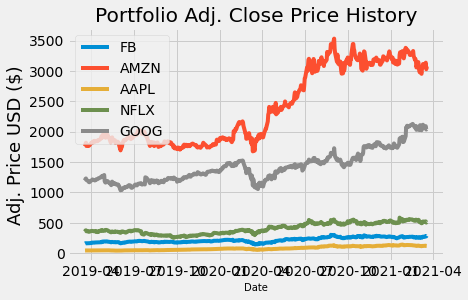

In [14]:
#Visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [15]:
#Show the daily simple return
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2019-03-19,NaN,NaN,NaN,NaN,NaN
2019-03-20,0.023952,0.020104,0.008739,0.045822,0.020953
2019-03-21,0.003868,0.012235,0.036830,0.007063,0.006185
2019-03-22,-0.010477,-0.029952,-0.020708,-0.044618,-0.021144
2019-03-25,0.011866,0.005377,-0.012091,0.014459,-0.010369
...,...,...,...,...,...
2021-03-15,0.019933,-0.002528,0.024457,0.004305,0.002216
2021-03-16,0.020201,0.003303,0.012743,0.007266,0.012596
2021-03-17,0.016936,0.014189,-0.006451,0.000782,-0.000688


In [17]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252 
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.142007,0.080441,0.101524,0.084775,0.091034
AMZN,0.080441,0.098231,0.080563,0.084332,0.066469
AAPL,0.101524,0.080563,0.143718,0.081080,0.084707
NFLX,0.084775,0.084332,0.081080,0.176204,0.070339
GOOG,0.091034,0.066469,0.084707,0.070339,0.107930


In [18]:
#Calculate the portfolio variance 
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.09274462068006287

In [19]:
# Calculate the portfolio volatillity aka standard deviation
port_volatility = np.sqrt(port_variance)
port_variance

0.09274462068006287

In [20]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3659743606498814

In [23]:
#Show the expected annual return, volatility (risk) and variance
percent_var = str(round(port_variance, 2) * 100 ) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return : '+ percent_ret)
print('Annual volatility / risk : '+ percent_vols)
print('Annual variance :' + percent_var)

Expect annual return : 37.0%
Annual volatility / risk : 30.0%
Annual variance :9.0%


In [24]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 1.3MB 6.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.11-cp37-cp37m-linux_x86_64.whl size=2725555 sha256=c9909c2ba4ffff69f24b745993f96fb60564bdb600d6a6024286a0c78da4684c
  Stored in directory: /root/.cache/pip/wheels/df/d4/eb/c74e09a39bc4ac09b3a8d2a48c1c6009f391056d8c87bf68aa
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [25]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [29]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.0), ('AMZN', 0.0), ('AAPL', 1.0), ('NFLX', 0.0), ('GOOG', 0.0)])
Expected annual return: 61.9%
Annual volatility: 37.9%
Sharpe Ratio: 1.58


(0.6192481525094253, 0.3791009542800486, 1.5807086364302583)

In [30]:
0.0 + 0.0 + 1.0 + 0.0 + 0.0

1.0

In [32]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 150000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation :', allocation)
print('Funds remaining : ${:.2f}'.format(leftover))


Discrete allocation : {'AAPL': 1250}
Funds remaining : $12.50
